In [10]:
import math
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import sys

project_path = Path('../../../')
data_path = project_path / 'data'

sns.set_palette("colorblind")
color_blind_list = sns.color_palette("colorblind", 8)
sns.set(style="whitegrid")

In [11]:
types_ = ["solar panels", "hydroelectricity", "onshore wind", "bioenergy", 
         "geothermal", "Concentrated Solar Power", "offshore wind"]

i = 4
for type_ in types_:
    df_c = pd.read_excel(data_path / "LCOE.xlsx", sheet_name=f"Figure 2.{str(i)}", usecols="J:L", header=1)
    df_c = df_c.rename(columns={'Year.2': 'année', 'Item.2': 'item'})
    df_c["type"] = type_
    df_c = df_c.set_index("année")
    if i > 4:
        df = pd.concat([df, df_c])
    else:
        df = df_c
    i +=1
    

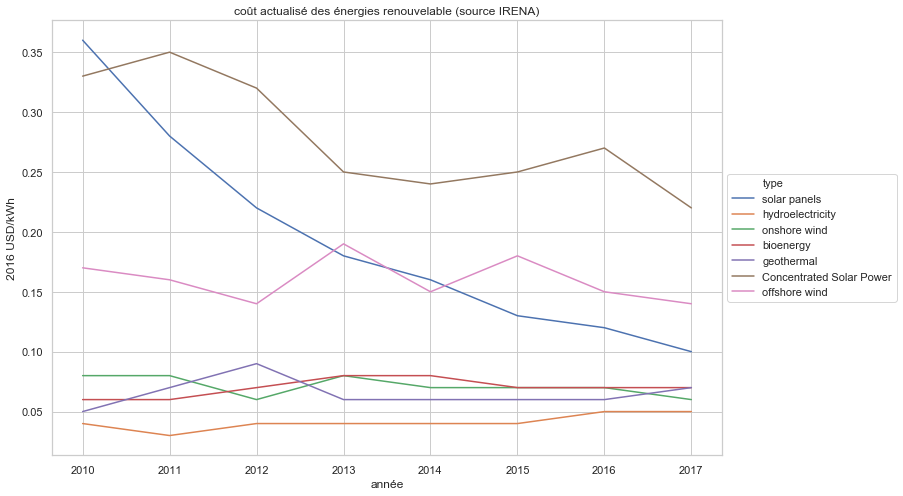

In [12]:
fig, ax = plt.subplots(figsize = (12,8))

data = df[df.item == 'Weighted Average']

sns.lineplot(data=data, x=data.index , y="2016 USD/kWh", hue="type", ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("coût actualisé des énergies renouvelable (source IRENA)")
plt.savefig("coût actualisé des énergies renouvelable (source IRENA)", dpi=500)
plt.show()
